In [4]:
import os
import numpy as np
from skimage.io import imread
from skimage.filters import laplace
from scipy.stats import entropy as scipy_entropy

def compute_nr_iqa(image):
    """
    Calculates no-reference image quality assessment (NR-IQA) features for a given image.

    Args:
        image (np.ndarray): The grayscale image for which to calculate NR-IQA features.

    Returns:
        dict: A dictionary containing the calculated NR-IQA features:
            - Standard Deviation: Standard deviation of pixel intensity values.
            - Laplacian Variance: Variance of the Laplacian filter applied to the image.
            - Entropy: Image entropy calculated using skimage.metrics.entropy.
    """

    std_dev = np.std(image)
    laplacian_img = laplace(image, ksize=3)  # Apply the Laplacian filter
    laplacian_var = np.var(laplacian_img)  # Compute the variance of the Laplacian
    # Calculate global entropy
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    prob_dist = hist / np.sum(hist)
    entropy_val = scipy_entropy(prob_dist, base=2)

    return {
        'Standard Deviation': std_dev,
        'Laplacian Variance': laplacian_var,
        'Entropy': entropy_val,
    }

# Define the folders to process
folders = ['/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Gaussian',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Gaussian',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Gaussian',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Gaussian',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Gaussian',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Gaussian']

# Initialize dictionaries to store the results
avg_results = {}

for folder in folders:
    results = []

    # Loop through each image in the folder
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.tif')):
            image_path = os.path.join(folder, filename)
            # Read the image
            image = imread(image_path)
            image = image / 255

           
            nr_iqa_features = compute_nr_iqa(image)
            results.append(nr_iqa_features)



    # Compute the average values for each feature
    avg_std_dev = np.mean([result['Standard Deviation'] for result in results])
    avg_laplacian_var = np.mean([result['Laplacian Variance'] for result in results])
    avg_entropy = np.mean([result['Entropy'] for result in results])

    # Store the average values in the avg_results dictionary
    avg_results[folder] = {
        'Average Standard Deviation': avg_std_dev,
        'Average Laplacian Variance': avg_laplacian_var,
        'Average Entropy': avg_entropy
    }

# Display the results
for folder, result in avg_results.items():
    print(f"Results for {folder}:")
    for feature, value in result.items():
        print(f"{feature}: {value:.4f}")
    print()


Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Gaussian:
Average Standard Deviation: 0.1228
Average Laplacian Variance: 0.0099
Average Entropy: 0.0000

Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Gaussian:
Average Standard Deviation: 0.0012
Average Laplacian Variance: 0.0000
Average Entropy: 0.0000

Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian:
Average Standard Deviation: 0.3431
Average Laplacian Variance: 0.3590
Average Entropy: 0

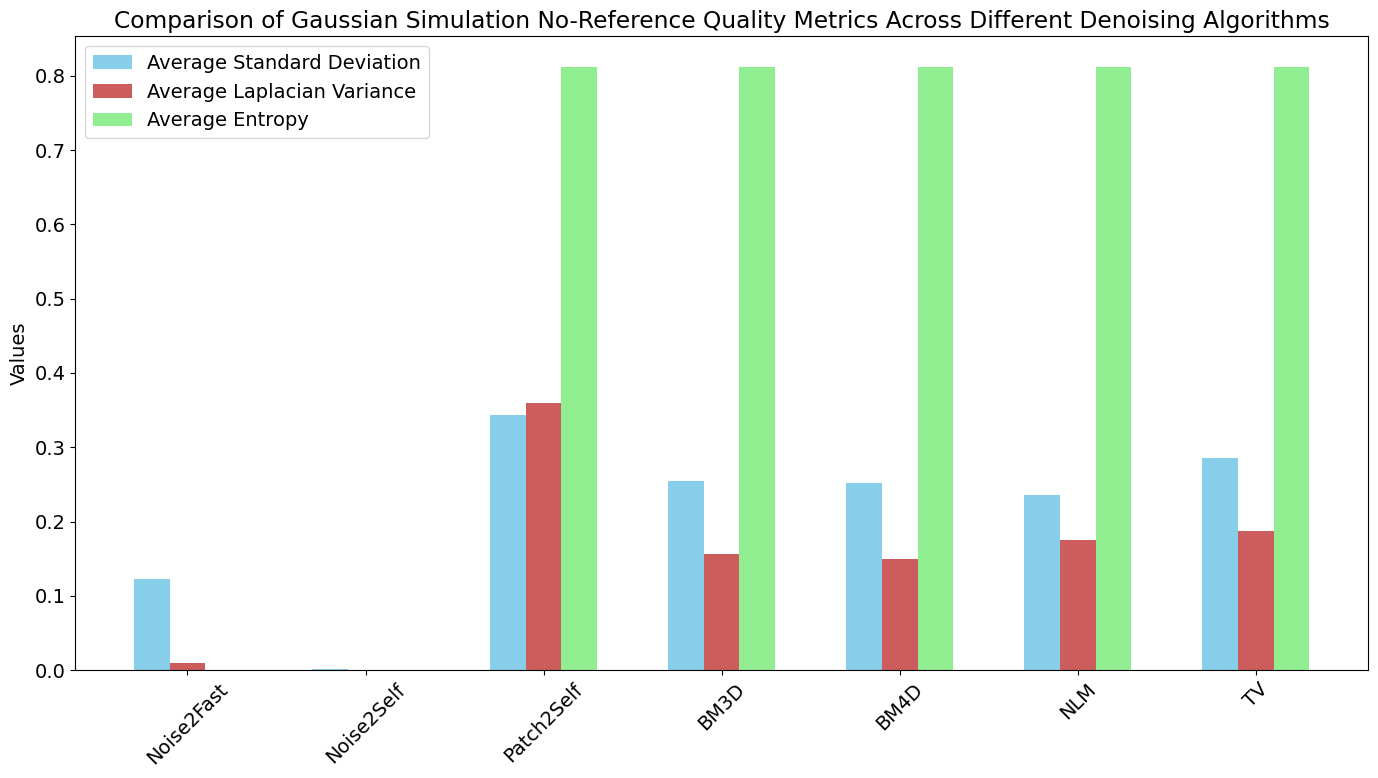

In [12]:
import matplotlib.pyplot as plt
import numpy as np


data = {
    "Algorithm": ["Noise2Fast", "Noise2Self", "Patch2Self", "BM3D", "BM4D", "NLM", "TV"],
    "Average Standard Deviation": [0.1228, 0.0012, 0.3431, 0.2547, 0.2519, 0.2356, 0.2860],
    "Average Laplacian Variance": [0.0099, 0.0000, 0.3590, 0.1558, 0.1502, 0.1747, 0.1872],
    "Average Entropy": [0.0000, 0.0000, 0.8114, 0.8115, 0.8115, 0.8114, 0.8124]
}




# Preparing the data for plotting
algorithms = data["Algorithm"]
avg_std_devs = data["Average Standard Deviation"]
avg_laplacian_vars = data["Average Laplacian Variance"]
avg_entropies = data["Average Entropy"]

x = np.arange(len(algorithms))  # the label locations
width = 0.2  # the width of the bars

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(14, 8))

# Plotting each metric
ax.bar(x - width, avg_std_devs, width=width, label='Average Standard Deviation', color='SkyBlue')
ax.bar(x, avg_laplacian_vars, width=width, label='Average Laplacian Variance', color='IndianRed')
ax.bar(x + width, avg_entropies, width=width, label='Average Entropy', color='LightGreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Comparison of Gaussian Simulation No-Reference Quality Metrics Across Different Denoising Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Rotate the tick labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [9]:
import os
import numpy as np
from skimage.io import imread
from skimage.filters import laplace
from scipy.stats import entropy as scipy_entropy

def compute_nr_iqa(image):
    """
    Calculates no-reference image quality assessment (NR-IQA) features for a given image.

    Args:
        image (np.ndarray): The grayscale image for which to calculate NR-IQA features.

    Returns:
        dict: A dictionary containing the calculated NR-IQA features:
            - Standard Deviation: Standard deviation of pixel intensity values.
            - Laplacian Variance: Variance of the Laplacian filter applied to the image.
            - Entropy: Image entropy calculated using skimage.metrics.entropy.
    """

    std_dev = np.std(image)
    laplacian_img = laplace(image, ksize=3)  # Apply the Laplacian filter
    laplacian_var = np.var(laplacian_img)  # Compute the variance of the Laplacian
    # Calculate global entropy
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    prob_dist = hist / np.sum(hist)
    entropy_val = scipy_entropy(prob_dist, base=2)

    return {
        'Standard Deviation': std_dev,
        'Laplacian Variance': laplacian_var,
        'Entropy': entropy_val,
    }

# Define the folders to process
folders = ['/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Rician',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Rician',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Rician',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Rician',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Rician',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Rician']

# Initialize dictionaries to store the results
avg_results = {}

for folder in folders:
    results = []

    # Loop through each image in the folder
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.tif')):
            image_path = os.path.join(folder, filename)
            # Read the image
            image = imread(image_path)
            image = image / 255

            # Check if the image is grayscale; if not, convert it
            if image.ndim == 3 and image.shape[2] == 3:
                image = rgb2gray(image)
            elif image.ndim == 3 and image.shape[2] == 1:
                image = np.squeeze(image)  # Remove the channel dimension

            # Your image processing and NR-IQA feature calculation continues here...
            nr_iqa_features = compute_nr_iqa(image)
            results.append(nr_iqa_features)



    # Compute the average values for each feature
    avg_std_dev = np.mean([result['Standard Deviation'] for result in results])
    avg_laplacian_var = np.mean([result['Laplacian Variance'] for result in results])
    avg_entropy = np.mean([result['Entropy'] for result in results])

    # Store the average values in the avg_results dictionary
    avg_results[folder] = {
        'Average Standard Deviation': avg_std_dev,
        'Average Laplacian Variance': avg_laplacian_var,
        'Average Entropy': avg_entropy
    }

# Display the results
for folder, result in avg_results.items():
    print(f"Results for {folder}:")
    for feature, value in result.items():
        print(f"{feature}: {value:.4f}")
    print()

Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Rician:
Average Standard Deviation: 0.1536
Average Laplacian Variance: 0.0156
Average Entropy: 0.0000

Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Rician:
Average Standard Deviation: 0.0013
Average Laplacian Variance: 0.0000
Average Entropy: 0.0000

Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician:
Average Standard Deviation: 0.3431
Average Laplacian Variance: 0.3590
Average Entropy: 0.8114


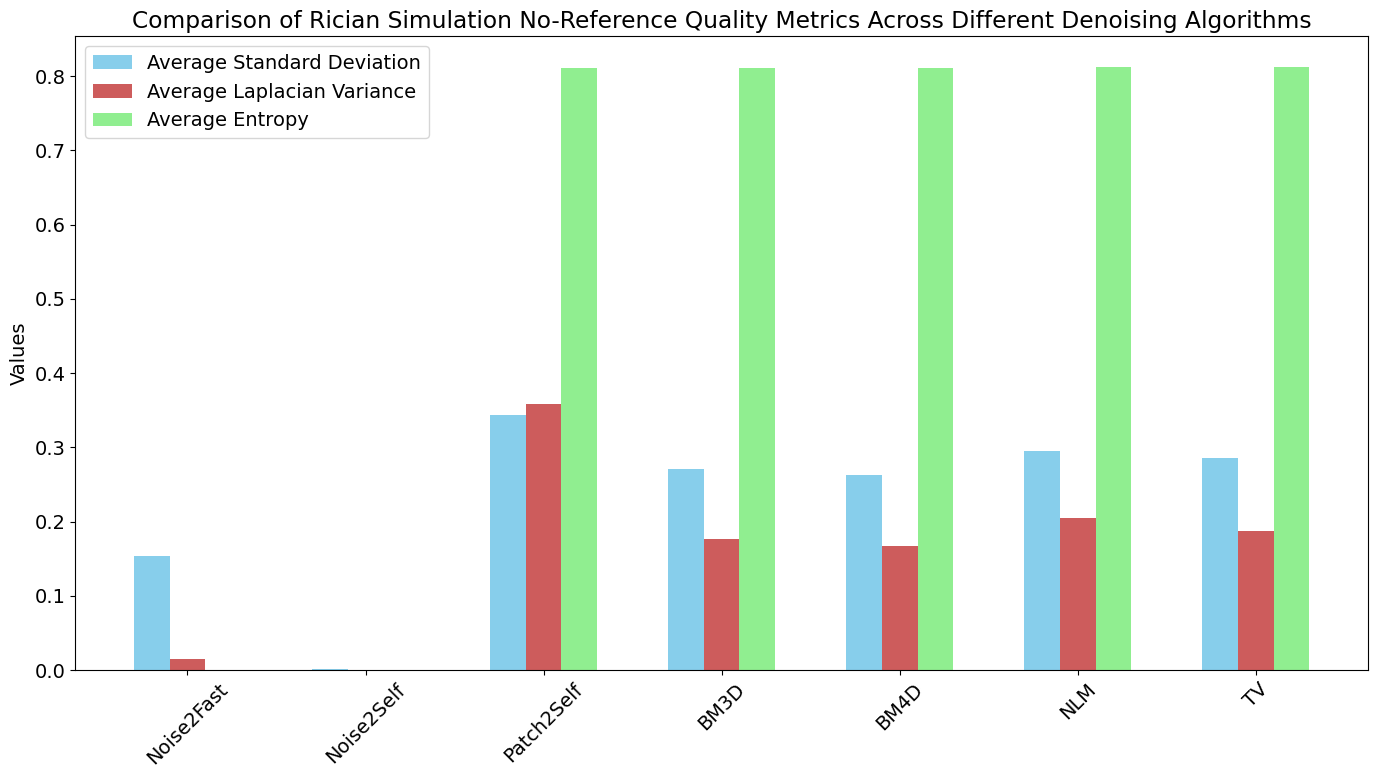

In [15]:
import pandas as pd
rician_data = {
    "Algorithm": ["Noise2Fast", "Noise2Self", "Patch2Self", "BM3D", "BM4D", "NLM", "TV"],
    "Average Standard Deviation": [0.1536, 0.0013, 0.3431, 0.2705, 0.2633, 0.2954, 0.2860],
    "Average Laplacian Variance": [0.0156, 0.0000, 0.3590, 0.1765, 0.1678, 0.2052, 0.1872],
    "Average Entropy": [0.0000, 0.0000, 0.8114, 0.8115, 0.8115, 0.8130, 0.8124]
}

rician_df = pd.DataFrame(rician_data)

# Preparing the data for plotting
algorithms_rician = rician_df["Algorithm"]
avg_std_devs_rician = rician_df["Average Standard Deviation"]
avg_laplacian_vars_rician = rician_df["Average Laplacian Variance"]
avg_entropies_rician = rician_df["Average Entropy"]

x_rician = np.arange(len(algorithms_rician))  # the label locations

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(14, 8))

# Plotting each metric for Rician noise
ax.bar(x_rician - width, avg_std_devs_rician, width=width, label='Average Standard Deviation', color='SkyBlue')
ax.bar(x_rician, avg_laplacian_vars_rician, width=width, label='Average Laplacian Variance', color='IndianRed')
ax.bar(x_rician + width, avg_entropies_rician, width=width, label='Average Entropy', color='LightGreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Comparison of Rician Simulation No-Reference Quality Metrics Across Different Denoising Algorithms')
ax.set_xticks(x_rician)
ax.set_xticklabels(algorithms_rician)
ax.legend()

# Rotate the tick labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

